In [34]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df= pd.read_csv('../Salaries.csv')

C:\Users\hp\AppData\Local\Temp\ipykernel_13504\36143332.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('../Salaries.csv')


In [36]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [38]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


# 1)Removing null values and preprocessing


In [39]:
df.isna().sum() / len(df) * 100

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.406985
OvertimePay           0.000000
OtherPay              0.000000
Benefits             24.324270
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status               74.357232
dtype: float64

In [40]:
df.drop(['Notes', 'Status'], axis=1, inplace=True)

In [41]:
df.isna().sum() / len(df) * 100

Id                   0.000000
EmployeeName         0.000000
JobTitle             0.000000
BasePay              0.406985
OvertimePay          0.000000
OtherPay             0.000000
Benefits            24.324270
TotalPay             0.000000
TotalPayBenefits     0.000000
Year                 0.000000
Agency               0.000000
dtype: float64

In [42]:
df.dropna(subset=['BasePay'], inplace=True)

In [43]:
df.isna().sum() / len(df) * 100

Id                   0.000000
EmployeeName         0.000000
JobTitle             0.000000
BasePay              0.000000
OvertimePay          0.000000
OtherPay             0.000000
Benefits            24.423671
TotalPay             0.000000
TotalPayBenefits     0.000000
Year                 0.000000
Agency               0.000000
dtype: float64

In [44]:
df['Benefits'].value_counts(dropna=False)

Benefits
NaN         36159
0.0           915
0.00          681
4659.36       107
25699.2        83
            ...  
521.15          1
448.44          1
418.84          1
467.34          1
29661.01        1
Name: count, Length: 99533, dtype: int64

In [45]:
df['Benefits'] = df['Benefits'].fillna(0)

In [46]:
df['Benefits'].value_counts(dropna=False)

Benefits
0           37074
0.00          681
4659.36       107
25699.2        83
37055.22       82
            ...  
521.15          1
448.44          1
418.84          1
467.34          1
30901.86        1
Name: count, Length: 99532, dtype: int64

In [47]:
df[df['Benefits'] == 'Not Provided'].index

Index([148646, 148650, 148651, 148652], dtype='int64')

In [48]:
df.drop([148646, 148650, 148651, 148652], inplace=True)

In [49]:
df.isna().sum() / len(df) * 100

Id                  0.0
EmployeeName        0.0
JobTitle            0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
Agency              0.0
dtype: float64

In [50]:
df.shape

(148045, 11)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148045 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148045 non-null  int64  
 1   EmployeeName      148045 non-null  object 
 2   JobTitle          148045 non-null  object 
 3   BasePay           148045 non-null  object 
 4   OvertimePay       148045 non-null  object 
 5   OtherPay          148045 non-null  object 
 6   Benefits          148045 non-null  object 
 7   TotalPay          148045 non-null  float64
 8   TotalPayBenefits  148045 non-null  float64
 9   Year              148045 non-null  int64  
 10  Agency            148045 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 13.6+ MB


In [52]:
df['Benefits'] = pd.to_numeric(df['Benefits'])
df['BasePay'] = pd.to_numeric(df['BasePay'])
df['OvertimePay'] = pd.to_numeric(df['OvertimePay'])
df['OtherPay'] = pd.to_numeric(df['OtherPay'])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148045 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148045 non-null  int64  
 1   EmployeeName      148045 non-null  object 
 2   JobTitle          148045 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148045 non-null  float64
 5   OtherPay          148045 non-null  float64
 6   Benefits          148045 non-null  float64
 7   TotalPay          148045 non-null  float64
 8   TotalPayBenefits  148045 non-null  float64
 9   Year              148045 non-null  int64  
 10  Agency            148045 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


In [54]:
df = df[df['TotalPayBenefits'] != 0]

# EDA Analysis


In [55]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148019.000000,148019.000000,148019.000000,148019.000000,148019.000000,148019.000000,148019.000000,148019.000000
mean,74181.883164,66337.099113,5087.634301,3646.301780,18983.667974,75071.035194,94054.703168,2012.520453
std,42941.888117,42759.354972,11473.991078,8020.057364,17176.057495,50404.371139,62676.590294,1.119315
min,1.000000,-166.010000,-0.010000,-7058.590000,-13.800000,-618.130000,-618.130000,2011.000000
25%,37008.500000,33615.605000,0.000000,0.000000,0.000000,37014.835000,45120.645000,2012.000000
50%,74013.000000,65014.780000,0.000000,818.030000,23476.330000,71652.740000,92685.190000,2013.000000
75%,111622.500000,94691.770000,4697.365000,4244.585000,33509.855000,106036.165000,133099.050000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


### What is the average BasePay ?


In [56]:
df['BasePay'].mean()

66337.09911288414

In [57]:
df['BasePay'].median()

65014.78

In [58]:
df['BasePay'].std()

42759.35497198876

<Axes: xlabel='BasePay', ylabel='Count'>

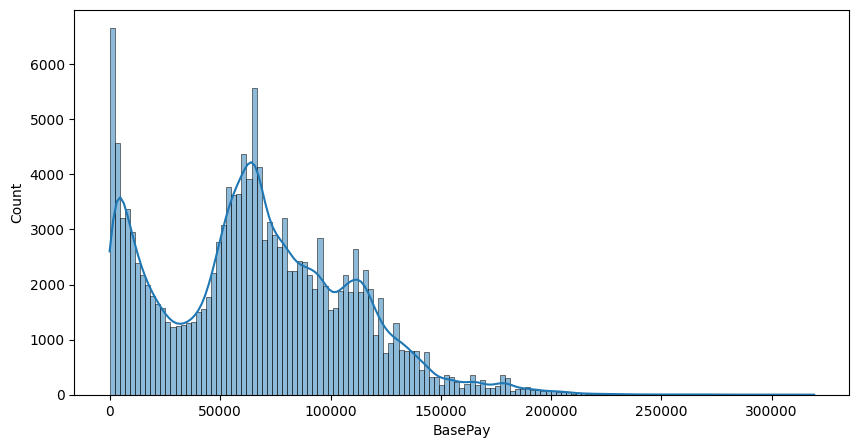

In [59]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='BasePay', kde=True)

### This is a Bimodal Distributions we will deal with that by separating this data into 2 groups

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


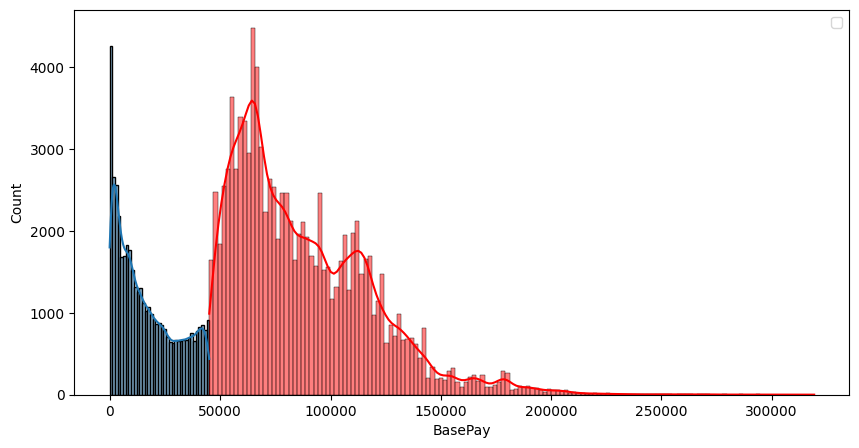

In [60]:
A = df['BasePay'][df['BasePay'] < 45000]
B = df['BasePay'][df['BasePay'] > 45000]
plt.figure(figsize=(10, 5))
sns.histplot(A, legend=True, kde=True)
sns.histplot(B, color='red', kde=True)
plt.legend()

In [61]:
print('Group A mean:', A.mean())
print('Group B mean:', B.mean())
print('-' * 50)
print('Group A median:', A.median())
print('Group B median:', B.median())

Group A mean: 16282.163223986767
Group B mean: 87607.00154719959
--------------------------------------------------
Group A median: 12641.5
Group B median: 79901.0


## Here the median is more accurate than the mean because the two groups are skewed to right

### Now we can find the job titles for each group 

In [62]:
df['JobTitle'] = df['JobTitle'].str.lower()

In [63]:
l_B = list(B.index)
group_B = df.iloc[l_B
                  ]

In [64]:
l_A = list(A.index)

l_A.sort(reverse=True)
l_A = l_A[608:]
group_A = df.iloc[l_A]

In [65]:
Jop_A = group_A['JobTitle'].value_counts()

In [66]:
Jop_A

JobTitle
special nurse                         4575
recreation leader                     2598
public svc aide-public works          2420
transit operator                      2417
public service trainee                1583
                                      ... 
court asst-sr, superior court            1
head photographer                        1
sheriff                                  1
ct comp sys engineer ii                  1
commander iii, (police department)       1
Name: count, Length: 1091, dtype: int64

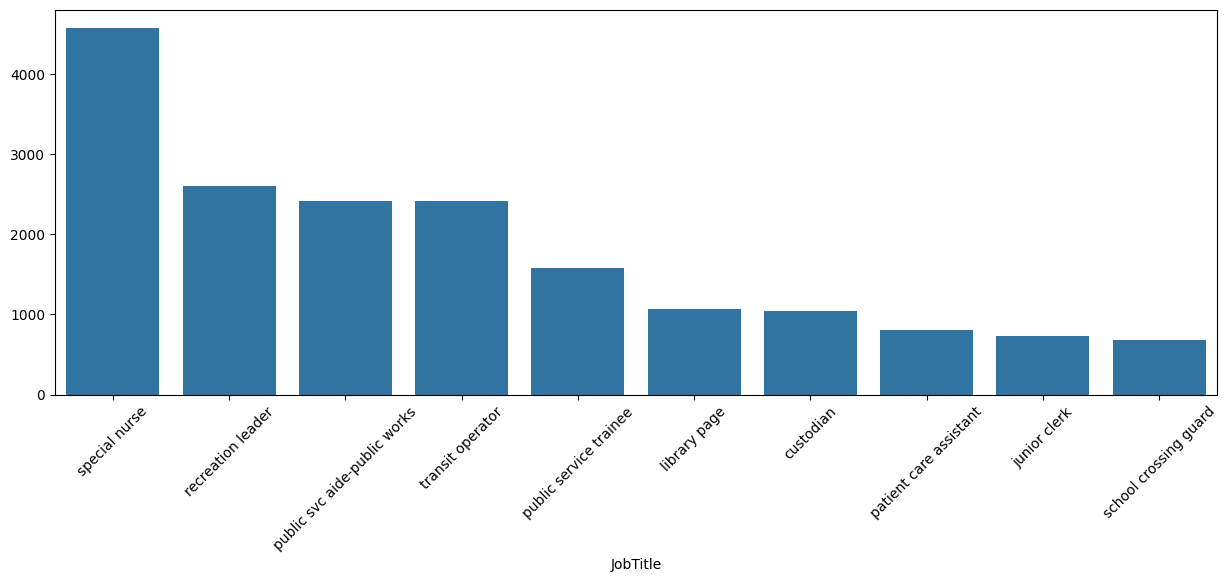

In [67]:
plt.figure(figsize=(15, 5))
sns.barplot(x=Jop_A.head(10).index, y=Jop_A.head(10).values)
plt.xticks(rotation=45)
plt.show()

In [68]:
Jop_B = group_B['JobTitle'].value_counts()

In [69]:
Jop_B

JobTitle
transit operator                             6931
registered nurse                             4552
firefighter                                  2942
deputy sheriff                               2501
police officer 3                             2233
                                             ... 
chief microbiologist                            1
wharfinger i                                    1
secretary, building inspection commission       1
electroencephalograph technician i              1
senior medical transcriber typist               1
Name: count, Length: 1562, dtype: int64

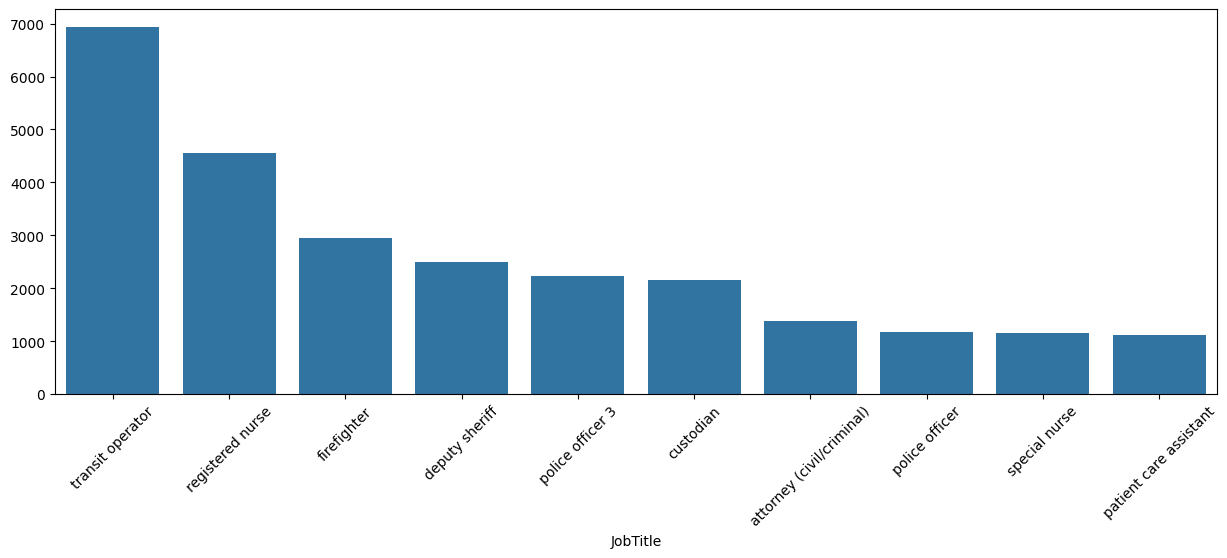

In [70]:
plt.figure(figsize=(15, 5))
sns.barplot(x=Jop_B.head(10).index, y=Jop_B.head(10).values)
plt.xticks(rotation=45)
plt.show()

# To Find the highest amount of OvertimePay in the dataset ?


In [71]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,general manager-metropolitan transit authority,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,captain iii (police department),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,captain iii (police department),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,wire rope cable maintenance mechanic,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"deputy chief of department,(fire department)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


In [72]:
df['OvertimePay'].max()

245131.88

# What is the job title Of JOSEPH DRISCOLL

In [73]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    captain, fire suppression
Name: JobTitle, dtype: object

# How much does JOSEPH DRISCOLL make (including benefits)?


In [74]:
df[df['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

# What is the name of highest paid person (including benefits)?


In [75]:
df[df['TotalPayBenefits'] == 567595.43]['EmployeeName']

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

# What is the name Of lowest paid person (including benefits)?


In [76]:
df[df['TotalPayBenefits'] == -618.13]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148653,148654,Joe Lopez,"counselor, log cabin ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,San Francisco


# What was the average (mean) BasePay Of all employees per year? (2011-2014) ?


In [77]:
df.groupby('Year')['BasePay'].mean()

Year
2011    63601.233314
2012    65436.406857
2013    69630.030216
2014    66604.609390
Name: BasePay, dtype: float64

# How many unique job titles are there?


In [78]:
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,general manager-metropolitan transit authority,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,captain iii (police department),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,captain iii (police department),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,wire rope cable maintenance mechanic,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"deputy chief of department,(fire department)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


In [79]:
df['JobTitle'].unique()


array(['general manager-metropolitan transit authority',
       'captain iii (police department)',
       'wire rope cable maintenance mechanic', ...,
       'forensic toxicologist supervis', 'conversion', 'cashier 3'],
      dtype=object)

# What are the top 5 most common jobs?


In [80]:
df['JobTitle'].value_counts().head(5)


JobTitle
transit operator    9362
special nurse       5784
registered nurse    4944
custodian           3202
firefighter         3142
Name: count, dtype: int64

# How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)


In [81]:
data_2013 = df[df['Year'] == 2013]

In [82]:
num_of_jobs = data_2013['JobTitle'].value_counts()


In [83]:
one_time = num_of_jobs[num_of_jobs == 1]


In [84]:
len(one_time)


202

# How many people have the word Chief in their job title? (This is pretty tricky)


In [85]:
len(df[df['JobTitle'].str.contains('chief')])


624

# Bonus: Is there a correlation between length of the Job Title string and Salary?


In [86]:
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,general manager-metropolitan transit authority,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,captain iii (police department),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,captain iii (police department),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,wire rope cable maintenance mechanic,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"deputy chief of department,(fire department)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


In [87]:
df['len_od_job'] = df['JobTitle'].apply(lambda x: len(x))

In [88]:
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,len_od_job
0,1,NATHANIEL FORD,general manager-metropolitan transit authority,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco,46
1,2,GARY JIMENEZ,captain iii (police department),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco,31
2,3,ALBERT PARDINI,captain iii (police department),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco,31
3,4,CHRISTOPHER CHONG,wire rope cable maintenance mechanic,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco,36
4,5,PATRICK GARDNER,"deputy chief of department,(fire department)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco,44


<Axes: xlabel='TotalPayBenefits', ylabel='len_od_job'>

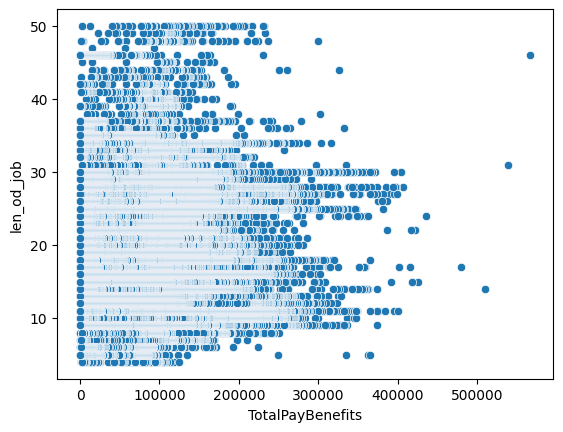

In [89]:
sns.scatterplot(data=df, y='len_od_job', x='TotalPayBenefits')

In [90]:
df.columns


Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency',
       'len_od_job'],
      dtype='object')

In [91]:
dfcor = df[[ 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 
       'len_od_job']]

In [92]:
dfcor

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,len_od_job
0,167411.18,0.00,400184.25,0.00,567595.43,567595.43,2011,46
1,155966.02,245131.88,137811.38,0.00,538909.28,538909.28,2011,31
2,212739.13,106088.18,16452.60,0.00,335279.91,335279.91,2011,31
3,77916.00,56120.71,198306.90,0.00,332343.61,332343.61,2011,36
4,134401.60,9737.00,182234.59,0.00,326373.19,326373.19,2011,44
...,...,...,...,...,...,...,...,...
148622,0.00,0.00,13.77,0.00,13.77,13.77,2014,12
148623,0.00,0.00,13.35,0.13,13.35,13.48,2014,25
148624,0.00,0.00,12.89,0.00,12.89,12.89,2014,12
148625,0.00,0.00,6.00,1.24,6.00,7.24,2014,16


In [93]:
dfcor.corr()['TotalPayBenefits']

BasePay             0.946574
OvertimePay         0.467499
OtherPay            0.425606
Benefits            0.781567
TotalPay            0.977144
TotalPayBenefits    1.000000
Year                0.155306
len_od_job         -0.036722
Name: TotalPayBenefits, dtype: float64